In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import os 
def process_tensor_columns(df, columns):
    """
    This function processes tensor columns by extracting numeric values.
    
    :param df: The input DataFrame
    :param columns: List of column names containing tensor values in the format 'tensor(<value>)'
    :return: Processed DataFrame with numeric values in the specified columns
    """
    for column in columns:
        df[column] = df[column].str.extract(r'tensor\((.+)\)')[0].astype(float)
    return df


def process_all_csv_in_folder(folder_path, columns):
    """
    This function processes all CSV files in the given folder.
    
    :param folder_path: The path of the folder containing CSV files
    :param columns: List of column names to process in each CSV file
    :return: A dictionary of processed DataFrames for each file
    """
    processed_data = {}
    
    # Iterate through each file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)
            df = pd.read_csv(file_path)
            
            # Process the tensor columns for the current file
            processed_df = process_tensor_columns(df, columns)
            processed_data[file_name] = processed_df
    
    return processed_data


In [34]:
from bert_score import score

def compute_bertscore(prediction: str, reference: str) -> tuple:
    #Inputs have to be lists so wrap them 
    predictions = [prediction]
    references = [reference]

    results = score(predictions, references, lang='en')

    precision = results[0].item()
    recall = results[1].item()
    f1 = results[2].item()
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)  

    return precision, recall, f1

# Example usage:
prediction = 'The text emphasizes the importance of accurate estimation of available PV power for several reasons: Grid reliability, accurate estimation is crucial for grid operators...'
reference = 'All around the world, system operators and utilities are continually adapting their grid codes, interconnection requirements...'

precision, recall, f1 = compute_bertscore(prediction, reference)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.8663163185119629
Recall: 0.8742483854293823
F1 Score: 0.8702642917633057


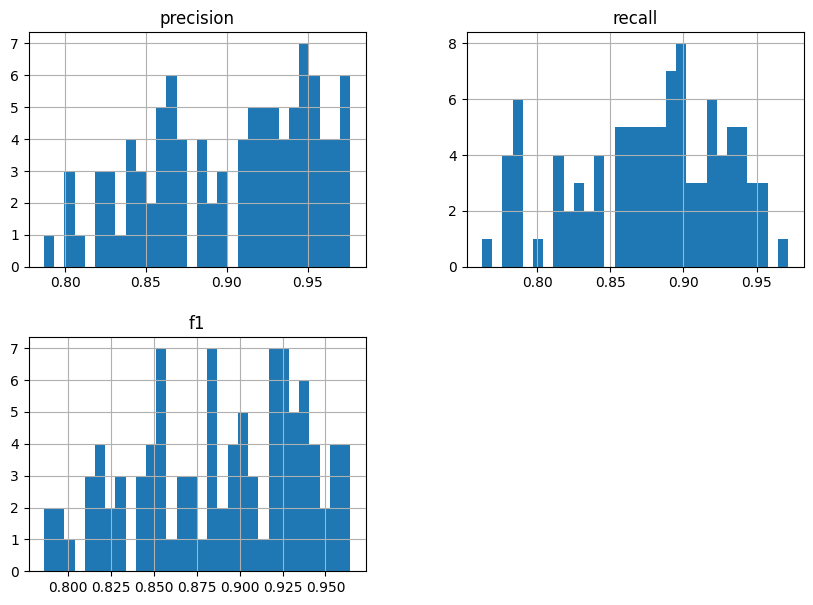

In [19]:
df[['precision', 'recall', 'f1']].hist(bins=30, figsize=(10, 7))

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

plt.show()

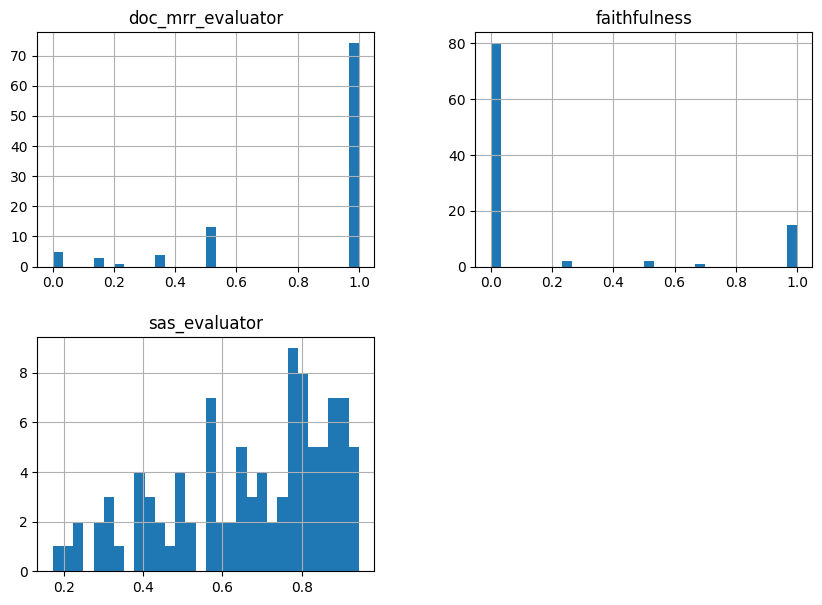

In [27]:
#Histograms
df[['doc_mrr_evaluator', 'faithfulness', 'sas_evaluator']].hist(bins=30, figsize=(10, 7))

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

plt.show()

In [277]:
meanf_0 = best.loc[best['doc_mrr_evaluator'] == 0, 'faithfulness'].mean()
meanf_1 = best.loc[best['doc_mrr_evaluator'] == 1, 'faithfulness'].mean()
print(meanf_0, meanf_1)

0.3083333333333333 0.17761904761904762


0.2887163281440735 0.5719839743205479


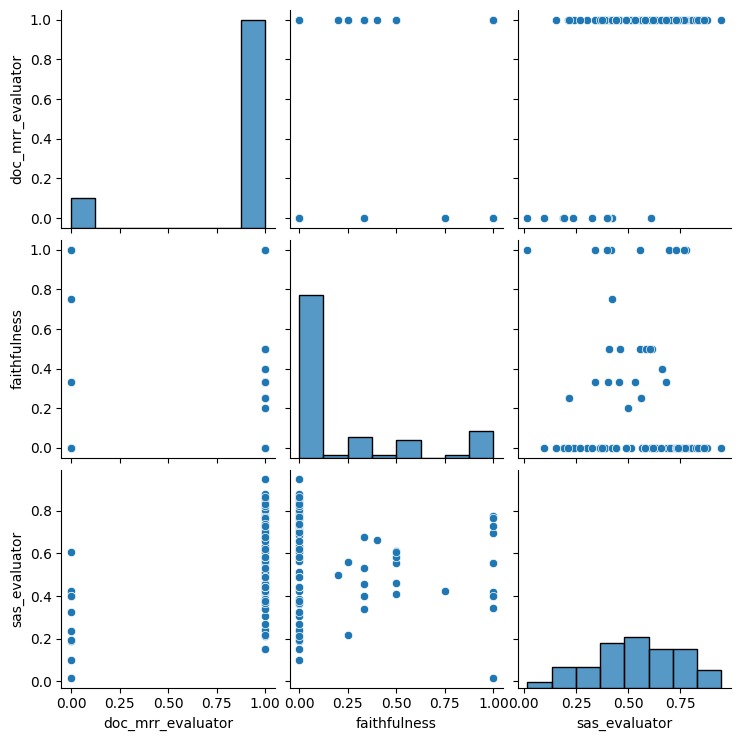

In [276]:
#Pairplots
import seaborn as sns
best = pd.read_csv(filepath_or_buffer= '/Users/stefanbozhilov/Documents/GitHub/Capstone-RAG-project/results_allmodels_withquestion/results_multi-qa-MiniLM-L6-cos-v1_model_weights_Mistral-7B-Instruct-v0.3-Q4_K_M.gguf_2_1.5.csv')
mean_0mrr = best.loc[best['doc_mrr_evaluator'] == 0, 'sas_evaluator'].mean()
mean_1mrr = best.loc[best['doc_mrr_evaluator'] == 1, 'sas_evaluator'].mean()
sns.pairplot(best[['doc_mrr_evaluator', 'faithfulness', 'sas_evaluator']])
print(mean_0mrr, mean_1mrr)

In [173]:
#Covariance Matrix
columns_to_check = ['doc_mrr_evaluator', 'faithfulness', 'sas_evaluator']
cov_matrix = best[columns_to_check].cov()

print(cov_matrix)

                   doc_mrr_evaluator  faithfulness  sas_evaluator
doc_mrr_evaluator           0.121616     -0.034293       0.041260
faithfulness               -0.034293      0.181130      -0.006642
sas_evaluator               0.041260     -0.006642       0.048932


# Embedding Model performance

In [208]:
import os
import pandas as pd

def highest_eval(folder_path, evaluators):
    """This function reads all CSV files in a given folder, processes specified evaluator column(s),
    and calculates the mean.

    :param folder_path: str
        The path to the folder containing the CSV files to be processed.
    :param evaluators: str or list of str
        The column name(s) representing the evaluators to be analyzed:
        - If a string is provided, the function computes the mean of the column's values.
        - If a list of strings is provided, the function computes the highest mean across the specified columns.

    :return: dict
        A dictionary where keys are file names (CSV files) and values are the computed evaluation metric
        (mean for single evaluator or the highest mean for multiple evaluators)."""

    highest_values = {}
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            file_path = os.path.join(folder_path, file_name)

            try:
                # Read the CSV file
                df = pd.read_csv(file_path)

                # Check if the specified columns exist
                if isinstance(evaluators, str):  # Single column
                    if evaluators in df.columns:
                        highest_values[file_name] = df[evaluators].mean()
                    else:
                        print(f"Warning: '{evaluators}' column not found in {file_name}")
                elif isinstance(evaluators, list):  # Multiple columns
                    missing_cols = [col for col in evaluators if col not in df.columns]
                    if missing_cols:
                        print(f"Warning: Columns {missing_cols} not found in {file_name}")
                    else:
                        highest_values[file_name] = df[evaluators].mean(axis=1).max()
                else:
                    print("Error: 'evaluators' should be a string or list of strings.")
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")

    return highest_values

filepath = 'results_allmodels_withquestion'
results = highest_eval(filepath, 'doc_mrr_evaluator')
print(results)

{'results_all-mpnet-base-v2_model_weights_Llama-3.2-3B-Instruct-Q3_K_L.gguf_2_1.5.csv': np.float64(0.8), 'results_all-mpnet-base-v2_model_weights_Mistral-7B-Instruct-v0.3-Q4_K_M.gguf_2_1.5.csv': np.float64(0.8), 'results_sentence-transformers_nli-bert-base-max-pooling_model_weights_Mistral-7B-Instruct-v0.3-Q4_K_M.gguf_2_1.5.csv': np.float64(0.275), 'results_multi-qa-MiniLM-L6-cos-v1_model_weights_Mistral-7B-Instruct-v0.3-Q4_K_M.gguf_2_1.5.csv': np.float64(0.875), 'results_multi-qa-mpnet-base-cos-v1_model_weights_Mistral-7B-Instruct-v0.3-Q4_K_M.gguf_2_1.5.csv': np.float64(0.875), 'results_all-MiniLM-L12-v2_model_weights_Llama-3.2-3B-Instruct-Q3_K_L.gguf_2_1.5.csv': np.float64(0.725), 'results_all-mpnet-base-v2_model_weights_Llama-3.2-3B-Instruct-Q6_K.gguf_2_1.5.csv': np.float64(0.8), 'results_multi-qa-MiniLM-L6-cos-v1_model_weights_Llama-3.2-3B-Instruct-Q6_K.gguf_2_1.5.csv': np.float64(0.875), 'results_sentence-transformers_nli-bert-base-max-pooling_model_weights_Llama-3.2-3B-Instruct-Q

### With hallucinations removed (no Q&A generation after desired answer)

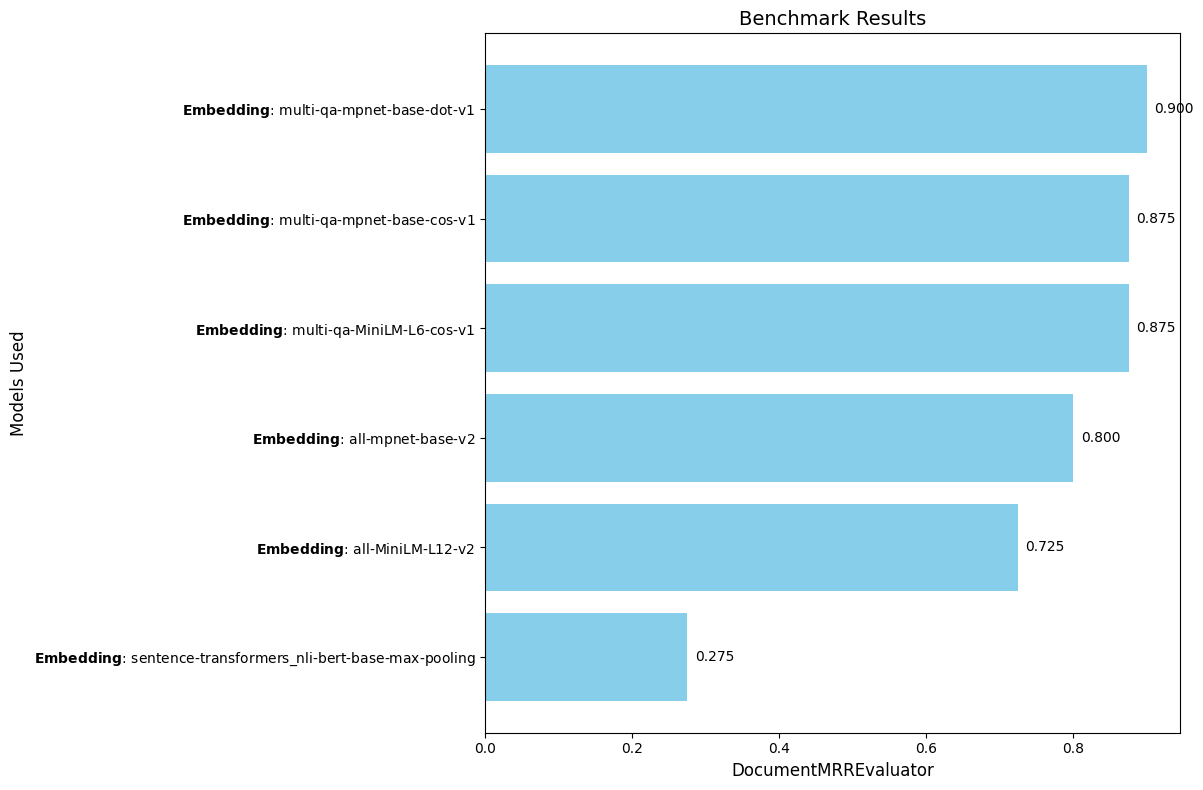

In [273]:
pattern = r'results_([a-zA-Z0-9\-\(\)_]+)_model_weights_([a-zA-Z0-9\.\-\_]+(?:-[a-zA-Z0-9]+)*)(?:-Q\d+.*)?(?:_gguf.*?\d+.*)?\.csv'
filepath = 'results_allmodels_cutquestion'
results = highest_eval(filepath, 'doc_mrr_evaluator')
plot_benchmark_results(results, pattern, 'DocumentMRREvaluator')


### With hallucinations

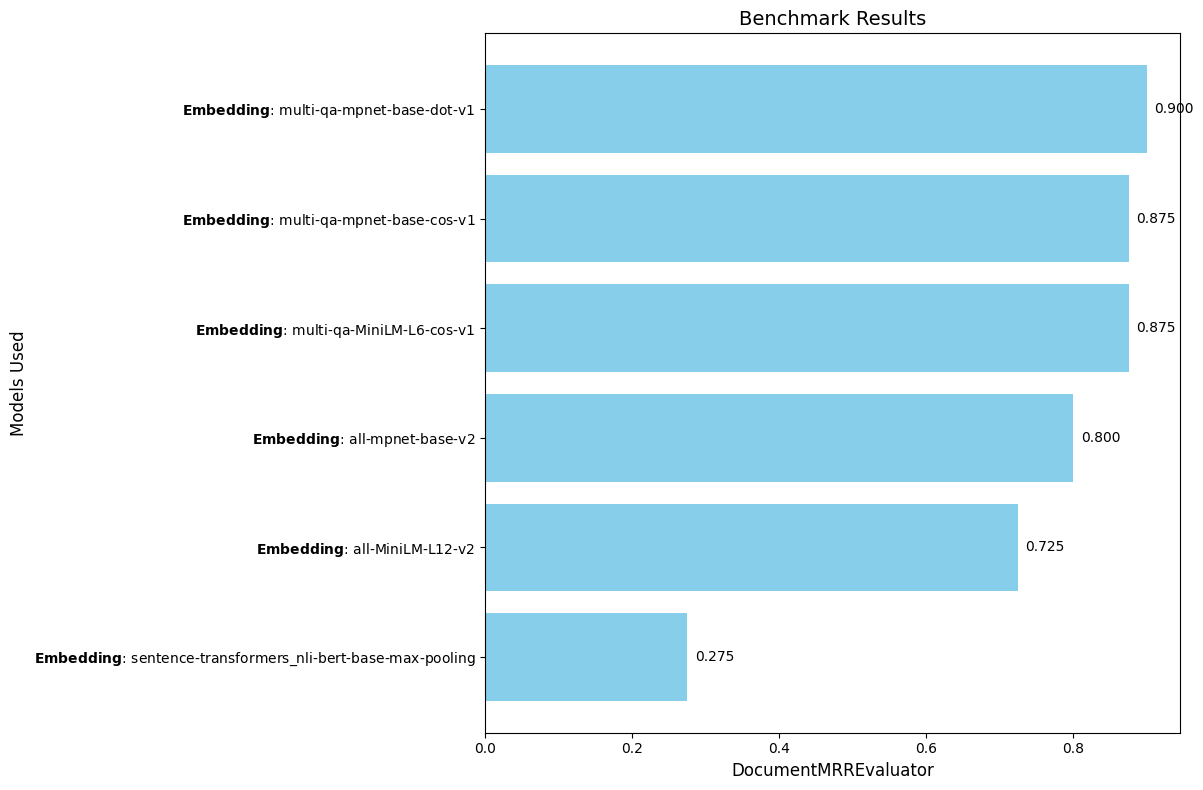

In [268]:
filepath_with = 'results_allmodels_withquestion'
with_results = highest_eval(filepath_with, 'doc_mrr_evaluator')
plot_benchmark_results(with_results, pattern, 'DocumentMRREvaluator')

# Embedding Model & LLM performance visualization 

### Plotting

<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/var/folders/rs/lp_7j4vj5_s59_pr61yffxl80000gn/T/ipykernel_6861/3831806737.py:17: SyntaxWarning: invalid escape sequence '\m'
  new_key = f'$\mathbf{{Embedding}}$: {embedding_model_name}, $\mathbf{{LLM}}$: {llm_name}'
/var/folders/rs/lp_7j4vj5_s59_pr61yffxl80000gn/T/ipykernel_6861/3831806737.py:17: SyntaxWarning: invalid escape sequence '\m'
  new_key = f'$\mathbf{{Embedding}}$: {embedding_model_name}, $\mathbf{{LLM}}$: {llm_name}'
/var/folders/rs/lp_7j4vj5_s59_pr61yffxl80000gn/T/ipykernel_6861/3831806737.py:19: SyntaxWarning: invalid escape sequence '\m'
  new_key = f'$\mathbf{{Embedding}}$: {embedding_model_name}'


25


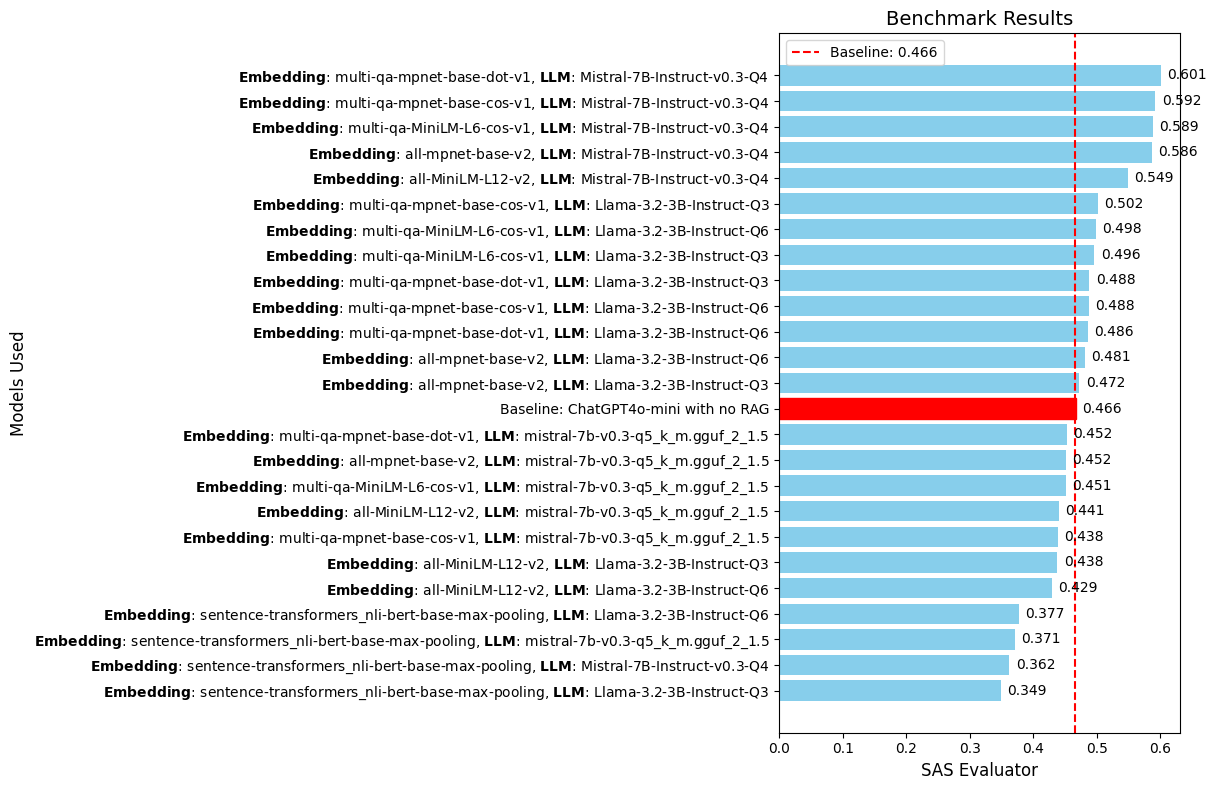

In [238]:
import matplotlib.pyplot as plt
import re

results = highest_eval('/Users/stefanbozhilov/Documents/GitHub/Capstone-RAG-project/results_allmodels_cutquestion', 'sas_evaluator')
print(len(results))

def plot_benchmark_results(results, pattern, metric_name: str, benchmark_file_path = None):
    updated_results = {}

    # Update the keys based on pattern matching
    for key, value in results.items():
        match = re.match(pattern, key)
        if match:
            embedding_model_name = match.group(1)
            llm_name = match.group(2).split('_K')[0]
            if metric_name == 'SAS Evaluator': 
                new_key = f'$\mathbf{{Embedding}}$: {embedding_model_name}, $\mathbf{{LLM}}$: {llm_name}'
            else: 
                new_key = f'$\mathbf{{Embedding}}$: {embedding_model_name}'
            updated_results[new_key] = value
        elif key == benchmark_file_path:  
            updated_results['Baseline: ChatGPT4o-mini with no RAG'] = value
        else:
            # Ignore unmatched cases without doing anything (this is data that hasn't been generated from our experiment)
            unmatched_pattern = r'^results_(inner-product|cosine)_all.*\.csv$'
            if re.match(unmatched_pattern, key):
                continue  # Skip unmatched keys completely
            # If it's another unmatchable case, also skip it (we regular expression below can capture all models names so nothing is omitted )
            continue

    # Sort results by value
    sorted_results = sorted(updated_results.items(), key=lambda item: item[1])

    labels = [item[0] for item in sorted_results]
    values = [item[1] for item in sorted_results]

    # Plotting
    plt.figure(figsize=(12, 8))
    bars = plt.barh(labels, values, color='skyblue')
    plt.xlabel(metric_name, fontsize=12)
    plt.ylabel("Models Used", fontsize=12)
    plt.title("Benchmark Results", fontsize=14)
    plt.tight_layout()

    for bar, value in zip(bars, values):
        plt.text(
            value + 0.01,  # X-coordinate (a little to the right of the bar)
            bar.get_y() + bar.get_height() / 2,  # Y-coordinate (center of the bar)
            f'{value:.3f}',  # Text to display (rounded to 3 decimals)
            va='center',  # Vertical alignment
            ha='left',  # Horizontal alignment
            fontsize=10  # Font size for the text
        )

    # Highlight benchmark value
    if benchmark_file_path: 
        benchmark_label = 'Baseline: ChatGPT4o-mini with no RAG'
        if benchmark_label in labels:
            benchmark_index = labels.index(benchmark_label)
            benchmark_value = round(values[benchmark_index], 3) 
            plt.axvline(benchmark_value, color='red', linestyle='--', label=f"Baseline: {benchmark_value}")
            bars[benchmark_index].set_color('red')  # Color the bar of the benchmark

    if benchmark_file_path: 
        plt.legend()
    plt.show()

# Usage
pattern = r'results_([a-zA-Z0-9\-\(\)_]+)_model_weights_([a-zA-Z0-9\.\-\_]+(?:-[a-zA-Z0-9]+)*)(?:-Q\d+.*)?(?:_gguf.*?\d+.*)?\.csv'
plot_benchmark_results(results, pattern, 'SAS Evaluator', 'results_gpt4o-mini_NO-RAG.csv')


25


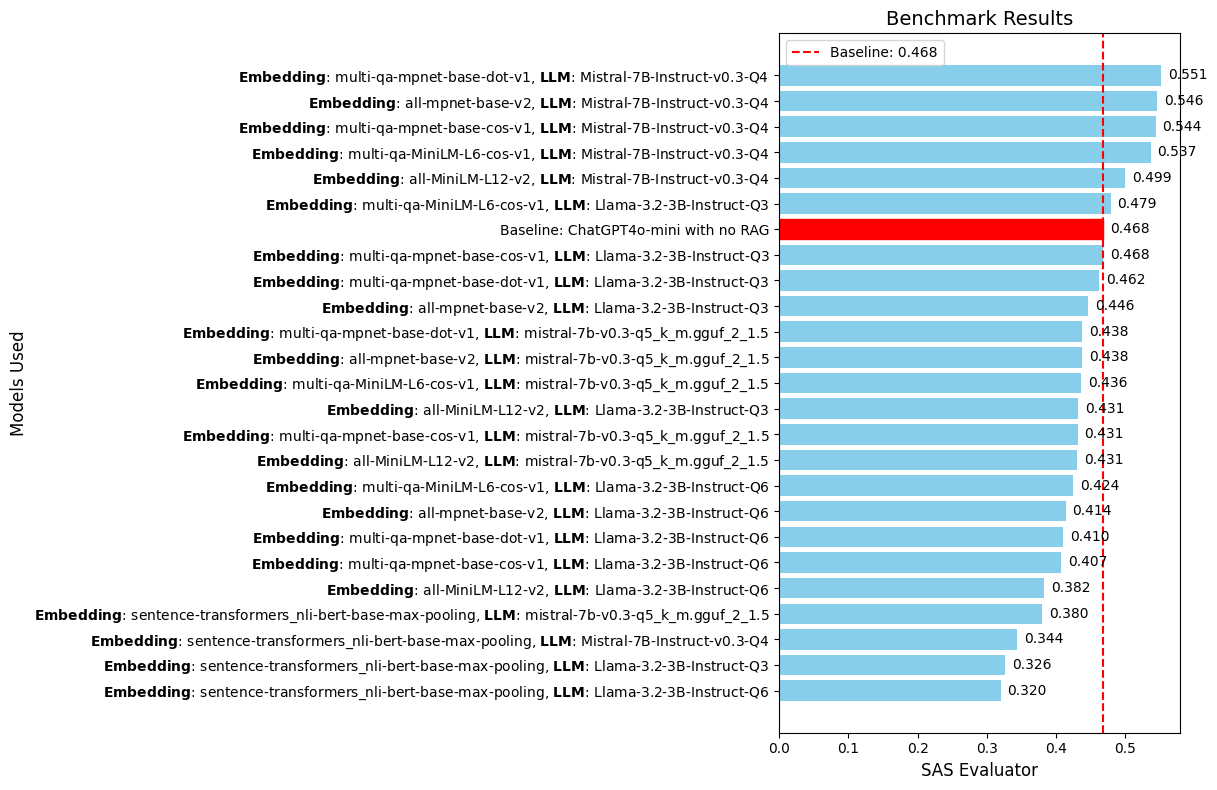

In [249]:
with_question = highest_eval('results_allmodels_withquestion', 'sas_evaluator')
print(len(with_question))
plot_benchmark_results(with_question, pattern, 'SAS Evaluator', 'results_gpt4o-mini_NO-RAG.csv')

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
/var/folders/rs/lp_7j4vj5_s59_pr61yffxl80000gn/T/ipykernel_6861/3394828149.py:16: SyntaxWarning: invalid escape sequence '\m'
  new_key = f'$\mathbf{{Embedding}}$: {embedding_model_name}, $\mathbf{{LLM}}$: {llm_name}'
/var/folders/rs/lp_7j4vj5_s59_pr61yffxl80000gn/T/ipykernel_6861/3394828149.py:16: SyntaxWarning: invalid escape sequence '\m'
  new_key = f'$\mathbf{{Embedding}}$: {embedding_model_name}, $\mathbf{{LLM}}$: {llm_name}'
/var/folders/rs/lp_7j4vj5_s59_pr61yffxl80000gn/T/ipykernel_6861/3394828149.py:18: SyntaxWarning: invalid escape sequence '\m'
  new_key = f'$\mathbf{{Embedding}}$: {embedding_model_name}'


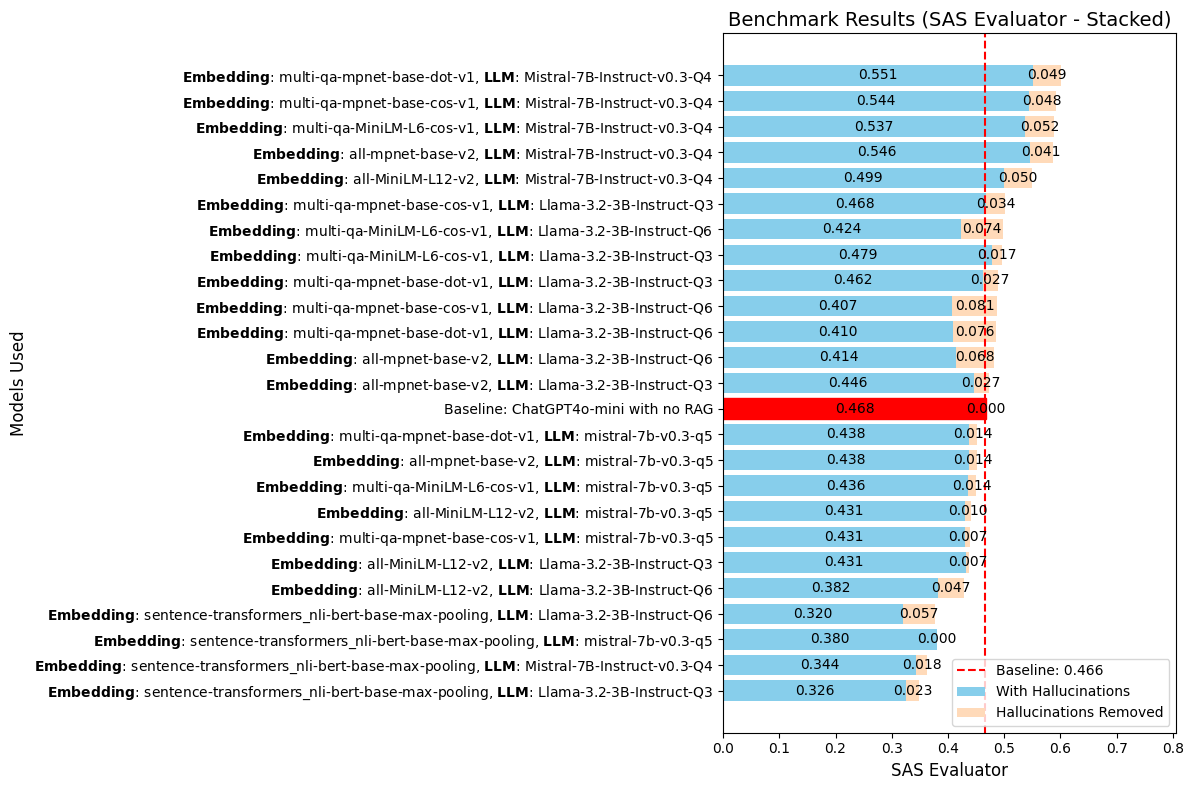

In [310]:
import matplotlib.pyplot as plt
import re

def plot_stacked_benchmark_results(better_results, worse_results, pattern, metric_name: str, benchmark_file_path):
    updated_better_results = {}
    updated_worse_results = {}

    # Update the keys based on pattern matching for both better and worse results
    for results, updated_results in zip([better_results, worse_results], [updated_better_results, updated_worse_results]):
        for key, value in results.items():
            match = re.match(pattern, key)
            if match:
                embedding_model_name = match.group(1)
                llm_name = re.split('_K|_k', match.group(2))[0]
                if metric_name == 'SAS Evaluator': 
                    new_key = f'$\mathbf{{Embedding}}$: {embedding_model_name}, $\mathbf{{LLM}}$: {llm_name}'
                else: 
                    new_key = f'$\mathbf{{Embedding}}$: {embedding_model_name}'
                updated_results[new_key] = value
            elif key == benchmark_file_path:  
                updated_results['Baseline: ChatGPT4o-mini with no RAG'] = value
            else:
                unmatched_pattern = r'^results_(inner-product|cosine)_all.*\.csv$'
                if re.match(unmatched_pattern, key):
                    continue  # Skip unmatched keys completely

    # Combine both results (better and worse) in a single dictionary
    all_labels = list(updated_better_results.keys())  # Assuming both dictionaries have the same labels
    better_values = [updated_better_results[label] for label in all_labels]
    worse_values = [updated_worse_results.get(label, 0) for label in all_labels]  # Default to 0 if no value found
    
    # Sort the values based on the "better performance" values
    sorted_indices = sorted(range(len(better_values)), key=lambda i: better_values[i], reverse=True)
    all_labels = [all_labels[i] for i in sorted_indices]
    better_values = [better_values[i] for i in sorted_indices]
    worse_values = [worse_values[i] for i in sorted_indices]

    # Plotting a stacked bar chart
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Create the base "worse performance" bars
    bars_worse = ax.barh(all_labels, worse_values, color='skyblue', label='With Hallucinations')

    # Create the "better performance" bars, stacked on top of the "worse performance" bars
    bars_better = ax.barh(all_labels, [max(0, better - worse) for better, worse in zip(better_values, worse_values)],
                          left=worse_values, color='peachpuff', label='Hallucinations Removed')  # Stacked on top
    
    ax.set_xlabel(metric_name, fontsize=12)
    ax.set_ylabel("Models Used", fontsize=12)
    ax.set_title(f"Benchmark Results ({metric_name} - Stacked)", fontsize=14)
    ax.legend()

    # Add values on the bars
    for i, (better, worse) in enumerate(zip(better_values, worse_values)):
        # Display the worse performance value in the center of the worse portion
        ax.text(worse / 2, i, f'{worse:.3f}', va='center', ha='center', fontsize=10)
        
        # Display the better performance value in the center of the better portion
        diff = max(0, better - worse)
        ax.text(worse + diff / 2, i, f'{diff:.3f}', va='center', ha='center', fontsize=10)

    if benchmark_file_path: 
        labels = all_labels
        values = better_values
        benchmark_label = 'Baseline: ChatGPT4o-mini with no RAG'
        if benchmark_label in labels:
            benchmark_index = labels.index(benchmark_label)
            benchmark_value = round(values[benchmark_index], 3) 
            plt.axvline(benchmark_value, color='red', linestyle='--', label=f"Baseline: {benchmark_value}")
            bars_worse[benchmark_index].set_color('red')  # Color the bar of the benchmark

    if benchmark_file_path: 
        plt.legend()

    # Reverse the y-axis to have the highest values at the top
    ax.invert_yaxis()

    # Adjust the scaling of bars to stack them correctly
    ax.set_xlim(0, max([sum(x) for x in zip(better_values, worse_values)]) * 0.7)

    plt.tight_layout()
    plt.show()


with_q = 'results_allmodels_withquestion'
cut_q = 'results_allmodels_cutquestion'

better_results = highest_eval(cut_q, 'sas_evaluator')
worse_results = highest_eval(with_q, 'sas_evaluator')

plot_stacked_benchmark_results(better_results, worse_results, pattern, 'SAS Evaluator', 'results_gpt4o-mini_NO-RAG.csv')

# PCA of Embedding Space

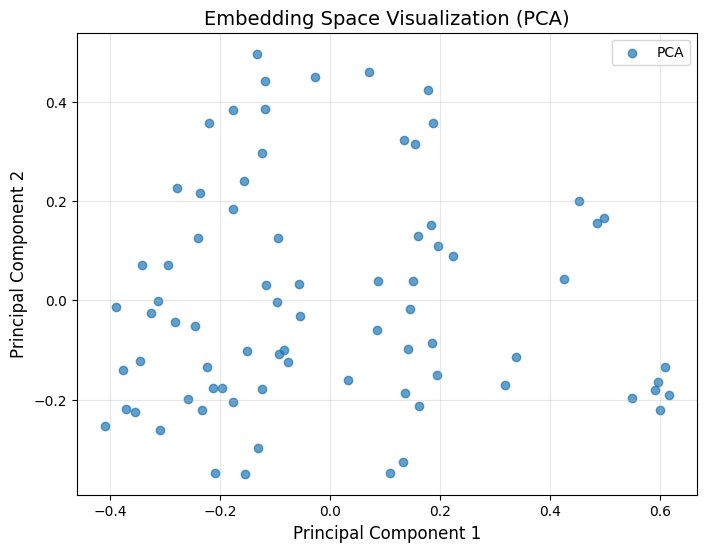

In [204]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

with open('./data/DocMerged.json', 'r') as file:
    document_store = json.load(file)

# Extract embeddings
embeddings = [
    doc['embedding'] 
    for doc in document_store['documents'] 
    if 'embedding' in doc
]

# Convert to numpy array
embeddings = np.array(embeddings)

# Dimensionality reduction (using PCA)
pca = PCA(n_components=2)
reduced_embeddings_pca = pca.fit_transform(embeddings)


# Plot PCA
plt.figure(figsize=(8, 6))
plt.scatter(reduced_embeddings_pca[:, 0], reduced_embeddings_pca[:, 1], alpha=0.7, label='PCA')
plt.title('Embedding Space Visualization (PCA)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

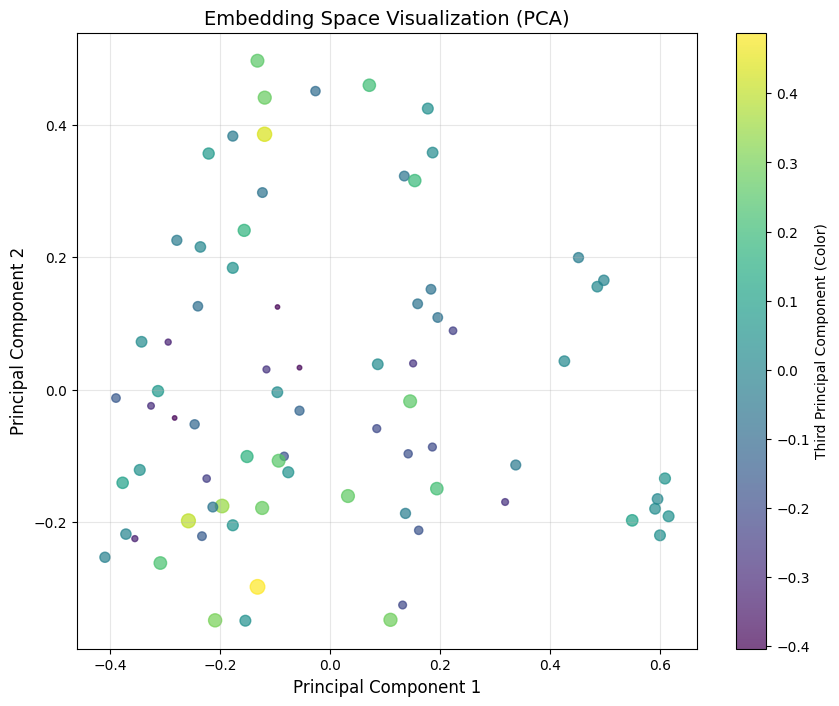

In [ ]:
# Dimensionality reduction (PCA for 3 components)
pca = PCA(n_components=3)
reduced_embeddings_pca = pca.fit_transform(embeddings)

# Extract the third principal component
third_component = reduced_embeddings_pca[:, 2]

# Normalize the third component for sizing the dots
dot_sizes = (third_component - third_component.min()) / (third_component.max() - third_component.min()) * 100 + 10

# Plot PCA with size representing the third component
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    reduced_embeddings_pca[:, 0], 
    reduced_embeddings_pca[:, 1], 
    s=dot_sizes,  # Use normalized third component as sizes
    alpha=0.7, 
    c=third_component,  
    cmap='viridis'
)
plt.colorbar(scatter, label="Third Principal Component (Color)")
plt.title('Embedding Space Visualization (PCA)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Hyperparameter Tuning Visualization

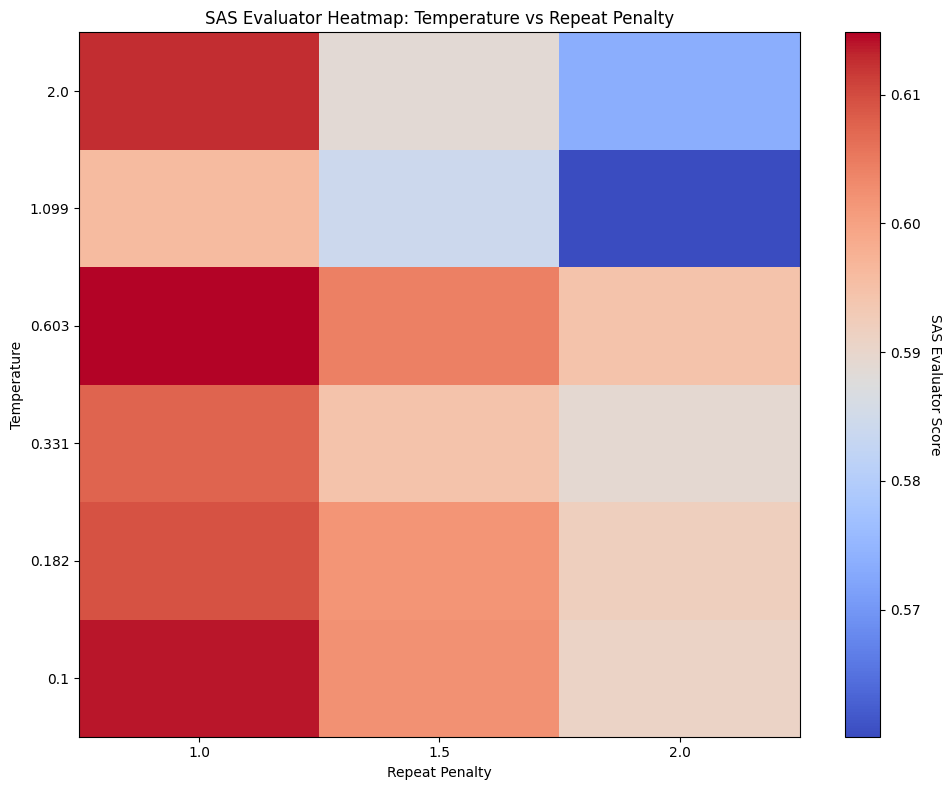

   Temperature  Repeat Penalty     Score
0        1.099             1.5  0.584195
1        0.331             1.5  0.594347
2        0.182             1.5  0.601791
3        2.000             1.0  0.612564
4        0.331             1.0  0.607408


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

def plot_temperature_vs_penalty(results, metric_name='SAS Evaluator'):
    temperatures = []
    penalties = []
    scores = []

    # Regular expression to extract temperature and repeat penalty with capture groups
    pattern = r"results_multi-qa-MiniLM-L6-cos-v1_model_weights_Mistral-7B-Instruct-v0\.3-Q4_K_M\.gguf_(\d+\.\d+)_([\d\.]+)\.csv"

    # Process results to extract relevant data from filenames and scores
    for file_name, score in results.items():
        match = re.search(pattern, file_name)
        if match:
            temperature = round(float(match.group(1)), 3) 
            penalty = float(match.group(2))
            temperatures.append(temperature)
            penalties.append(penalty)
            scores.append(score)

    # Table for plotting
    data = pd.DataFrame({
        'Temperature': temperatures,
        'Repeat Penalty': penalties,
        'Score': scores
    })

    # Pivot the data to create a heatmap-like structure
    pivot_data = data.pivot(index='Temperature', columns='Repeat Penalty', values='Score')

    # Plotting
    plt.figure(figsize=(10, 8))
    heatmap = plt.imshow(pivot_data, cmap='coolwarm', aspect='auto', origin='lower')

    # Add color bar and labels
    cbar = plt.colorbar(heatmap)
    cbar.set_label(f'{metric_name} Score', rotation=270, labelpad=15)
    plt.xlabel('Repeat Penalty')
    plt.ylabel('Temperature')
    plt.title(f'{metric_name} Heatmap: Temperature vs Repeat Penalty')

    # Set axis ticks to match the temperature and penalty values
    plt.xticks(ticks=range(len(pivot_data.columns)), labels=pivot_data.columns)
    plt.yticks(ticks=range(len(pivot_data.index)), labels=pivot_data.index)

    plt.tight_layout()
    plt.show()
    print(data.head())
# Usage:
folder_path = 'results'
evaluators = 'sas_evaluator'  # You can also pass a list of evaluator columns

# Get results using the highest_eval function
results = highest_eval(folder_path, evaluators)

# Visualize the results with the plot_temperature_vs_penalty function
plot_temperature_vs_penalty(results, metric_name='SAS Evaluator')

In [ ]:
import re

# Example filename
filename = 'results_multi-qa-MiniLM-L6-cos-v1_model_weights_Mistral-7B-Instruct-v0.3-Q4_K_M.gguf_0.33144540173399867_1.csv'

# Regex pattern to capture temperature and repeat penalty
pattern = r"results_multi-qa-MiniLM-L6-cos-v1_model_weights_Mistral-7B-Instruct-v0\.3-Q4_K_M\.gguf_(\d+\.\d+)_([\d\.]+)\.csv"

# Applying the regex to extract temperature and repeat penalty
match = re.search(pattern, filename)
if match:
    temperature = float(match.group(1))
    repeat_penalty = float(match.group(2))
    print(f'Temperature: {temperature}, Repeat Penalty: {repeat_penalty}')
else:
    print("No match found")

Temperature: 0.33144540173399867, Repeat Penalty: 1.0
